Week2 - Project2- Sales & Customer Behaviour Insights - Green Cart Ltd.
**Name: **Bhoomi Sharma **Date: **26/09/2025

Objective:

This Project analyze Sales and User behaviors across region and product lines.


In [1]:
## Week2 Data Wrangling & Visual Exploration
## set up python libearies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
### Task 1: Load the data into seperate pandas dataframe
sales_df    = pd.read_csv("sales_data.csv")       ## Sales data
product_df  = pd.read_csv("product_info.csv")     ## Product data
customer_df = pd.read_csv("customer_info.csv")    ## Customer data

In [4]:
print("Loaded shapes:")
print(" sales_df   :", sales_df.shape)
print(" product_df :", product_df.shape)
print(" customer_df:", customer_df.shape, "\n")

Loaded shapes:
 sales_df   : (3000, 10)
 product_df : (30, 6)
 customer_df: (500, 6) 



In [5]:
# listed data columns
print("sales_df columns:", list(sales_df.columns))
print("product_df columns:", list(product_df.columns))
print("customer_df columns:", list(customer_df.columns), "\n")


sales_df columns: ['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price', 'order_date', 'delivery_status', 'payment_method', 'region', 'discount_applied']
product_df columns: ['product_id', 'product_name', 'category', 'launch_date', 'base_price', 'supplier_code']
customer_df columns: ['customer_id', 'email', 'signup_date', 'gender', 'region', 'loyalty_tier'] 



In [6]:
### Task 2: cleaning the each datasets
### a) first clean Sales table
## Clean delivery_status, Payment_method, and region
sales_df["delivery_status"] = sales_df["delivery_status"].astype(str).str.strip().str.title()
sales_df["payment_method"]  = sales_df["payment_method"].astype(str).str.strip().fillna("Unknown")
sales_df["region"]          = sales_df["region"].astype(str).str.strip().fillna("Unknown")

In [7]:
### Convert date to datetime
sales_df["order_date"] = pd.to_datetime(
    sales_df["order_date"], 
    format="%d-%m-%Y",   # tell pandas the format
    errors="coerce"      # invalid dates become NaT
)



In [8]:
## Rescue Excel serial dates (numbers like 45123)
##  We re-read the original CSV column to check if any numeric serials exist
_raw_sales = pd.read_csv("sales_data.csv")  # adjust path if needed
if "order_date" in _raw_sales.columns:
    _serial = pd.to_numeric(_raw_sales["order_date"], errors="coerce")  # numeric serials become numbers, others NaN
    _excel_epoch = pd.to_datetime("1899-12-30")
    _needs_fix = sales_df["order_date"].isna() & _serial.notna()
    sales_df.loc[_needs_fix, "order_date"] = _excel_epoch + pd.to_timedelta(_serial[_needs_fix], unit="D")
print("order_date parsed. Non-null rows:", int(sales_df["order_date"].notna().sum()))

order_date parsed. Non-null rows: 2998


In [9]:
## Convert numeric columns
sales_df["quantity"] = pd.to_numeric(sales_df["quantity"], errors="coerce").fillna(0).clip(lower=0)
sales_df["unit_price"] = pd.to_numeric(sales_df["unit_price"], errors="coerce").fillna(0).clip(lower=0)
sales_df["discount_applied"] = pd.to_numeric(sales_df["discount_applied"], errors="coerce").fillna(0).clip(lower=0)

In [10]:
# Remove duplicates by order_id
sales_df = sales_df.drop_duplicates(subset=["order_id"], keep="last")

In [11]:
### b) Second clean Product Table 
### Clean text column
product_df["product_name"] = product_df["product_name"].astype(str).str.strip().str.title()
product_df["category"] = product_df["category"].astype(str).str.strip().fillna("Unknown")
product_df["supplier_code"] = product_df["supplier_code"].astype(str).str.strip().fillna("Unknown")

In [12]:
### Convert Date to datetime
product_df["launch_date"] =  pd.to_datetime(
    product_df["launch_date"],
    format = "%d-%m-%Y" ,
    errors = "coerce"
)

In [13]:
# launch_date (product_df) if needed
if "launch_date" in product_df.columns:
    _raw_prod = pd.read_csv("product_info.csv")
    if "launch_date" in _raw_prod.columns:
        _serial2 = pd.to_numeric(_raw_prod["launch_date"], errors="coerce")
        _excel_epoch = pd.to_datetime("1899-12-30")
        _needs2 = product_df["launch_date"].isna() & _serial2.notna()
        product_df.loc[_needs2, "launch_date"] = _excel_epoch + pd.to_timedelta(_serial2[_needs2], unit="D")
print("launch_date parsed. Non-null rows:", int(product_df["launch_date"].notna().sum()))

launch_date parsed. Non-null rows: 0


In [14]:
## convert numeric columns
product_df["base_price"] = pd.to_numeric(product_df["base_price"], errors="coerce").fillna(0).clip(lower=0)

In [15]:
# Remove duplicates by product_id
product_df = product_df.drop_duplicates(subset=["product_id"], keep="last")

In [16]:
### c) Third one customer table clean
### clean text column
customer_df["email"] = customer_df["email"].astype(str).str.strip()
customer_df["gender"] = customer_df["gender"].astype(str).str.strip().str.title()
customer_df["region"] = customer_df["region"].astype(str).str.strip().fillna("Unknown")
customer_df["loyalty_tier"] = customer_df["loyalty_tier"].astype(str).str.strip().str.lower().str.title().fillna("Unknown")


In [17]:
# Remove duplicates by customer_id
customer_df = customer_df.drop_duplicates(subset=["customer_id"], keep="last")

In [18]:
## Convert date to datetime 
customer_df["signup_date"] =  pd.to_datetime(
    customer_df["signup_date"],
    format = "%d-%m-%Y" ,
    errors = "coerce"
)

In [19]:
# ---- Rescue Excel serial dates (simple, inline)
# signup_date (customer_df)
if "signup_date" in customer_df.columns:
    # read raw column once more as strings/numbers to detect serials
    _raw_cust = pd.read_csv("customer_info.csv")
    if "signup_date" in _raw_cust.columns:
        _serial = pd.to_numeric(_raw_cust["signup_date"], errors="coerce")
        _excel_epoch = pd.to_datetime("1899-12-30")
        _needs = customer_df["signup_date"].isna() & _serial.notna()
        customer_df.loc[_needs, "signup_date"] = _excel_epoch + pd.to_timedelta(_serial[_needs], unit="D")
print("signup_date parsed. Non-null rows:", int(customer_df["signup_date"].notna().sum()))

signup_date parsed. Non-null rows: 0


In [20]:
print("Launch_date unique examples:")
print(product_df["launch_date"].head(20))

print("\nSignup_date unique examples:")
print(customer_df["signup_date"].head(20))

Launch_date unique examples:
0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
5    NaT
6    NaT
7    NaT
8    NaT
9    NaT
10   NaT
11   NaT
12   NaT
13   NaT
14   NaT
15   NaT
16   NaT
17   NaT
18   NaT
19   NaT
Name: launch_date, dtype: datetime64[ns]

Signup_date unique examples:
0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
5    NaT
6    NaT
7    NaT
8    NaT
9    NaT
10   NaT
11   NaT
12   NaT
13   NaT
14   NaT
15   NaT
16   NaT
17   NaT
18   NaT
19   NaT
Name: signup_date, dtype: datetime64[ns]


In [21]:
### Now cleaning done 
sales_df_clean = sales_df
product_df_clean = product_df
customer_df_clean = customer_df

print("Done cleaning.")
print(" sales_df_clean   :", sales_df_clean.shape)
print(" product_df_clean :", product_df_clean.shape)
print(" customer_df_clean:", customer_df_clean.shape, "\n")

Done cleaning.
 sales_df_clean   : (2998, 10)
 product_df_clean : (30, 6)
 customer_df_clean: (498, 6) 



In [22]:
### Task 3: Merge the datasets (left joins on product_id and customer_id)
### First merge sales + product on product_id
merged_df = pd.merge(sales_df_clean, product_df_clean, on="product_id", how="left")

In [23]:
#### now merge with customer on customer_id
merged_df = pd.merge(merged_df, customer_df_clean, on="customer_id", how="left")
print("Merged shape:", merged_df.shape)
print(merged_df.head(5))

Merged shape: (2998, 20)
  order_id customer_id product_id  quantity  unit_price order_date  \
0  O966977      C00397      P0022       3.0       39.25 2025-07-06   
1  O696648      C00236      P0023       5.0       18.92 2025-07-06   
2  O202644      C00492      P0011       1.0       29.68 2025-07-07   
3  O501803      C00031      P0003       1.0       32.76 2025-07-08   
4  O322242      C00495      P0016       1.0       47.62 2025-07-08   

  delivery_status payment_method region_x  discount_applied  \
0       Delivered         PayPal  Central              0.00   
1         Delayed    credit card    North              0.00   
2       Delivered  Bank Transfer    North              0.15   
3       Cancelled    Credit Card  Central              0.20   
4         Delayed    Credit Card     West              0.20   

          product_name  category launch_date  base_price supplier_code  \
0  Cleaning Product 86  Cleaning         NaT       19.77          S924   
1  Outdoors Product 32  Out

In [24]:
#### Task 4:Feature Engineering
# revenue = quantity × unit_price × (1 - discount_applied)
merged_df["revenue"] = merged_df["quantity"] * merged_df["unit_price"] * (1 - merged_df["discount_applied"])

In [25]:
# order_week = ISO week number from order_date
merged_df["order_week"] = merged_df["order_date"].dt.isocalendar().week.astype("Int64")

In [26]:
# price_band from unit_price: Low (<15), Medium (15–30), High (>30)
merged_df["price_band"] = pd.cut(
    merged_df["unit_price"],
    bins=[-np.inf, 15, 30, np.inf],
    labels=["Low", "Medium", "High"]
)


In [27]:
# days_to_order = (order_date - launch_date) in days
merged_df["days_to_order"] = (merged_df["order_date"] - merged_df["launch_date"]).dt.days

In [28]:
# email_domain from email (everything after the @)
merged_df["email_domain"] = merged_df["email"].str.extract(r'@(.+)$', expand=False)

In [29]:
# is_late flag → delivery_status == "Delayed"
merged_df["is_late"] = (merged_df["delivery_status"] == "Delayed")

print("\nAfter features, columns now include:")
print(["revenue", "order_week", "price_band", "days_to_order", "email_domain", "is_late"])


After features, columns now include:
['revenue', 'order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late']


In [30]:
#  Save and quick checks
merged_df.to_csv("merged_green_cart.csv", index=False)
print("\nSaved merged file → merged_green_cart.csv")

print("\nMerged_df shape:", merged_df.shape)
print("\nMerged_df sample:")
print(merged_df.head(10))



Saved merged file → merged_green_cart.csv

Merged_df shape: (2998, 26)

Merged_df sample:
  order_id customer_id product_id  quantity  unit_price order_date  \
0  O966977      C00397      P0022       3.0       39.25 2025-07-06   
1  O696648      C00236      P0023       5.0       18.92 2025-07-06   
2  O202644      C00492      P0011       1.0       29.68 2025-07-07   
3  O501803      C00031      P0003       1.0       32.76 2025-07-08   
4  O322242      C00495      P0016       1.0       47.62 2025-07-08   
5  O190175      C00388      P0005       3.0       37.89 2025-07-10   
6  O272646      C00328      P0027       5.0       30.83 2025-07-12   
7  O411881      C00201      P0019       3.0       12.56 2025-07-14   
8  O170570      C00076      P0030       3.0       28.32 2025-07-16   
9  O619944      C00330      P0002       1.0       30.96 2025-07-18   

  delivery_status payment_method region_x  discount_applied  ... signup_date  \
0       Delivered         PayPal  Central              0.0

In [31]:
### Task 5: Create summary table 
### Decide which region column to use
if "region_y" in merged_df.columns:
    merged_df["region"] = merged_df["region_y"]
elif "region_x" in merged_df.columns:
    merged_df["region"] = merged_df["region_x"]
else:
    merged_df["region"] = np.nan  # fallback

weekly_revenue_by_region = (merged_df.dropna(subset=["order_week"]).groupby(["order_week", "region"], dropna=False)["revenue"]
      .sum().reset_index().sort_values(["order_week", "region"]))

print("\n--- Weekly revenue by region (top 20 rows) ---")
print(weekly_revenue_by_region.head(20))

weekly_revenue_by_region.to_csv("tbl_weekly_revenue_by_region.csv", index=False)
print("Saved → tbl_weekly_revenue_by_region.csv")


--- Weekly revenue by region (top 20 rows) ---
    order_week   region    revenue
0           14  Central   144.8155
1           14     East   166.0600
2           14    North    29.1240
3           14     West    47.9040
4           15  Central   202.6325
5           15    North   188.3520
6           15    South    25.0470
7           15     West    47.1200
8           16  Central   310.4665
9           16     East   193.8475
10          16     West   234.5725
11          17     East   211.0650
12          17    North    98.9510
13          17    South     7.7580
14          17     West   160.5565
15          18  Central  1283.8730
16          18     East   522.3005
17          18    North  1022.6455
18          18    South   668.6980
19          18     West   526.4320
Saved → tbl_weekly_revenue_by_region.csv


In [32]:
### 2) Product category performance
##(revenue, quantity, average discount)

category_perf = (
    merged_df
      .groupby("category", dropna=False)
      .agg(
          total_revenue=("revenue", "sum"),
          total_quantity=("quantity", "sum"),
          avg_discount=("discount_applied", "mean")
      )
      .reset_index()
      .sort_values("total_revenue", ascending=False)
)

print("\n--- Product category performance (top 20) ---")
print(category_perf.head(20))

category_perf.to_csv("tbl_category_performance.csv", index=False)
print("Saved → tbl_category_performance.csv")



--- Product category performance (top 20) ---
        category  total_revenue  total_quantity  avg_discount
0       Cleaning     93599.6710          3583.0      0.085673
4        Storage     46781.3475          1726.0      0.080642
2       Outdoors     40103.9440          1525.0      0.082087
1        Kitchen     33993.0415          1229.0      0.075558
3  Personal Care     24916.6365           902.0      0.086755
5            NaN       610.6565            22.0      0.150000
Saved → tbl_category_performance.csv


In [33]:
## 3) Customer behaviour by loyalty_tier and signup_month
##   (orders count, unique customers, revenue)
if "signup_date" in merged_df.columns and "signup_month" not in merged_df.columns:
    merged_df["signup_month"] = merged_df["signup_date"].dt.to_period("M").astype(str)

cust_behaviour = (
    merged_df
      .groupby(["loyalty_tier", "signup_month"], dropna=False)
      .agg(
          orders=("order_id", "nunique"),
          customers=("customer_id", "nunique"),
          revenue=("revenue", "sum")
      )
      .reset_index()
      .sort_values(["loyalty_tier", "signup_month"])
)

print("\n--- Customer behaviour by loyalty_tier and signup_month (top 30) ---")
print(cust_behaviour.head(30))

cust_behaviour.to_csv("tbl_customer_behaviour.csv", index=False)
print("Saved → tbl_customer_behaviour.csv")


--- Customer behaviour by loyalty_tier and signup_month (top 30) ---
  loyalty_tier signup_month  orders  customers      revenue
0        Brnze          NaT      11          2     803.5460
1       Bronze          NaT     614        111   48281.5225
2          Gld          NaT      13          2    1084.9690
3         Gold          NaT    1665        263  135653.9490
4          Nan          NaT       9          2     767.2730
5       Silver          NaT     655        115   51311.3320
6       Sllver          NaT       6          1     777.3595
7          NaN          NaT      24          3    1325.3460
Saved → tbl_customer_behaviour.csv


In [34]:
## 4) Delivery performance by region and price_band
##    (orders, late_orders, late_rate)
delivery_perf = (merged_df.groupby(["region", "price_band"], dropna=False).agg(orders=("order_id", "nunique"),
                late_orders=("is_late", "sum")).reset_index())

delivery_perf["late_rate"] = (delivery_perf["late_orders"] / delivery_perf["orders"]).round(3)

print("\n--- Delivery performance by region & price_band ---")
print(delivery_perf.sort_values(["region", "price_band"]).head(30))

delivery_perf.to_csv("tbl_delivery_performance.csv", index=False)
print("Saved → tbl_delivery_performance.csv")


--- Delivery performance by region & price_band ---
     region price_band  orders  late_orders  late_rate
3   Central        Low      91           35      0.385
4   Central     Medium     225           92      0.409
5   Central       High     244          102      0.418
6      East        Low      98           33      0.337
7      East     Medium     217           70      0.323
8      East       High     287          107      0.373
9     North        Low      98           43      0.439
10    North     Medium     208           78      0.375
11    North       High     300          116      0.387
12    South        Low      95           40      0.421
13    South     Medium     229           91      0.397
14    South       High     247          100      0.405
15     West        Low     101           34      0.337
16     West     Medium     225          104      0.462
17     West       High     293          116      0.396
18      nan        Low       3            0      0.000
19      nan 

In [35]:
## 5) Payment method preferences by loyalty_tier
##    (pivot: counts of orders)
payment_pivot = (merged_df.pivot_table(index="loyalty_tier",columns="payment_method",values="order_id",aggfunc="nunique",
                 fill_value=0).reset_index())

print("\n--- Payment method preferences by loyalty_tier ---")
print(payment_pivot)

payment_pivot.to_csv("tbl_payment_by_loyalty.csv", index=False)
print("Saved → tbl_payment_by_loyalty.csv")


--- Payment method preferences by loyalty_tier ---
payment_method loyalty_tier  Bank Transfer  Credit Card  PayPal  bank transfr  \
0                     Brnze              2            3       4             0   
1                    Bronze            177          149     159             0   
2                       Gld              3            1       4             0   
3                      Gold            402          421     425             1   
4                       Nan              0            5       3             0   
5                    Silver            192          141     162             0   
6                    Sllver              0            5       0             0   

payment_method  credit card  nan  
0                         2    0  
1                       129    0  
2                         5    0  
3                       414    2  
4                         1    0  
5                       159    1  
6                         1    0  
Saved → tbl_payment

In [36]:
## 6) (Bonus) Top 10 products by revenue
top_products = ( merged_df.groupby(["product_id", "product_name", "category"], dropna=False)["revenue"].sum().reset_index()
      .sort_values("revenue", ascending=False).head(10))

print("\n--- Top 10 products by revenue ---")
print(top_products)

top_products.to_csv("tbl_top10_products.csv", index=False)
print("Saved → tbl_top10_products.csv")


--- Top 10 products by revenue ---
   product_id              product_name       category    revenue
14      P0015        Storage Product 10        Storage  9927.6675
10      P0011        Kitchen Product 53        Kitchen  9786.2430
9       P0010       Cleaning Product 70       Cleaning  9660.0335
3       P0004        Kitchen Product 82        Kitchen  9571.9290
26      P0027       Outdoors Product 55       Outdoors  8826.3530
5       P0006       Cleaning Product 16       Cleaning  8772.3020
21      P0022       Cleaning Product 86       Cleaning  8670.3850
13      P0014       Outdoors Product 91       Outdoors  8562.5455
16      P0017  Personal Care Product 11  Personal Care  8542.9125
6       P0007  Personal Care Product 64  Personal Care  8458.1120
Saved → tbl_top10_products.csv


In [37]:
## 7) (Bonus) Top 10 customers by revenue
top_customers = (merged_df.groupby(["customer_id", "loyalty_tier", "region"], dropna=False)["revenue"].sum().reset_index()
      .sort_values("revenue", ascending=False).head(10))

print("\n--- Top 10 customers by revenue ---")
print(top_customers)
top_customers.to_csv("tbl_top10_customers.csv", index=False)
print("Saved → tbl_top10_customers.csv")


--- Top 10 customers by revenue ---
    customer_id loyalty_tier   region    revenue
107      C00108       Bronze     West  1546.4655
384      C00385         Gold    South  1488.3685
61       C00062         Gold     West  1212.6120
103      C00104       Silver     West  1211.8955
190      C00191       Silver     East  1183.7035
191      C00192         Gold     West  1155.9840
498      C00500         Gold    North  1150.0855
477      C00479         Gold    South  1149.4580
7        C00008         Gold  Central  1141.7745
300      C00301         Gold  Central  1134.9630
Saved → tbl_top10_customers.csv


In [38]:
## Task 6: Visual Exploration
# Make sure figs folder exists
import os
os.makedirs("figs", exist_ok=True)

In [39]:
print(customer_df_clean[["customer_id","region"]].head())
print(merged_df[["customer_id","region"]].head())

  customer_id   region
0      C00001  Central
1      C00002  Central
2      C00003  Central
3      C00004  Central
4      C00005     West
  customer_id   region
0      C00397    North
1      C00236    North
2      C00492  Central
3      C00031  Central
4      C00495  Central


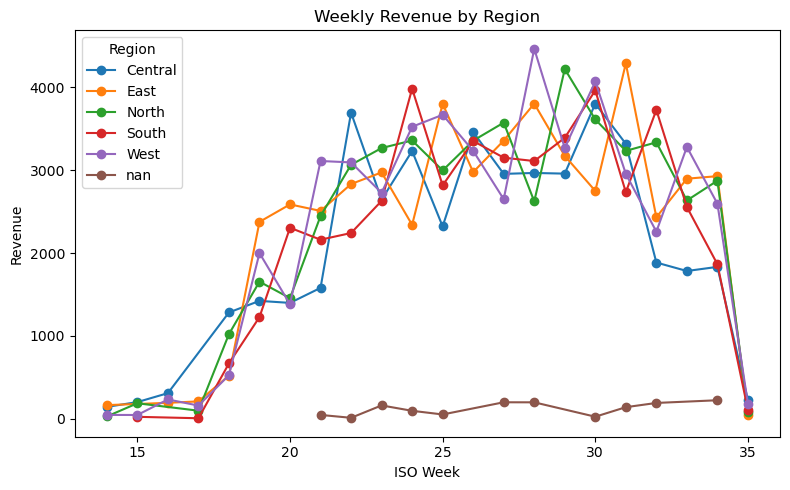

In [40]:
### 1) Line plot — weekly revenue trends by region
plt.figure(figsize=(8,5))

if not weekly_revenue_by_region.empty:
    for reg, grp in weekly_revenue_by_region.groupby("region"):
        plt.plot(grp["order_week"], grp["revenue"], marker="o", label=str(reg))
    plt.title("Weekly Revenue by Region")
    plt.xlabel("ISO Week")
    plt.ylabel("Revenue")
    plt.legend(title="Region")
    plt.tight_layout()
    plt.savefig("figs/1_weekly_revenue_by_region.png", dpi=150)
    plt.show()
else:
    print("⚠️ weekly_revenue_by_region is empty — check your data.")


Columns in category_perf: ['category', 'total_revenue', 'total_quantity', 'avg_discount']
        category  total_revenue  total_quantity  avg_discount
0       Cleaning     93599.6710          3583.0      0.085673
4        Storage     46781.3475          1726.0      0.080642
2       Outdoors     40103.9440          1525.0      0.082087
1        Kitchen     33993.0415          1229.0      0.075558
3  Personal Care     24916.6365           902.0      0.086755


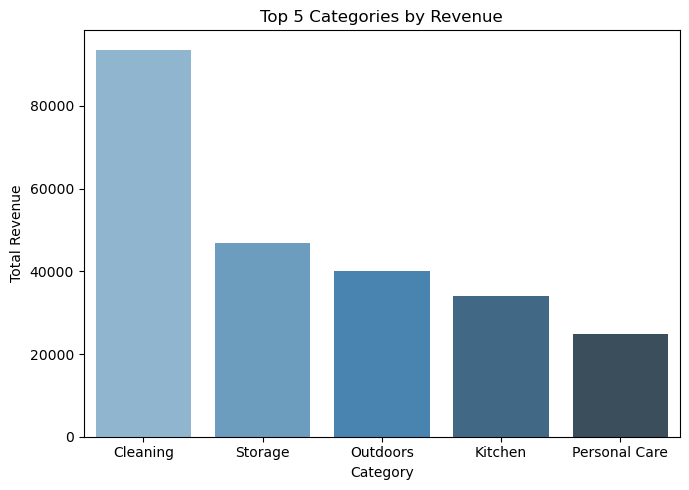

In [41]:
### 2) Bar chart — top 5 categories by revenue
print("\nColumns in category_perf:", category_perf.columns.tolist())
print(category_perf.head())

plt.figure(figsize=(7,5))
top5 = category_perf.head(5)

# Use "total_revenue" since that's the actual column name
sns.barplot(data=top5, x="category", y="total_revenue", palette="Blues_d")

plt.title("Top 5 Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.savefig("figs/2_top5_categories_by_revenue.png", dpi=150)
plt.show()

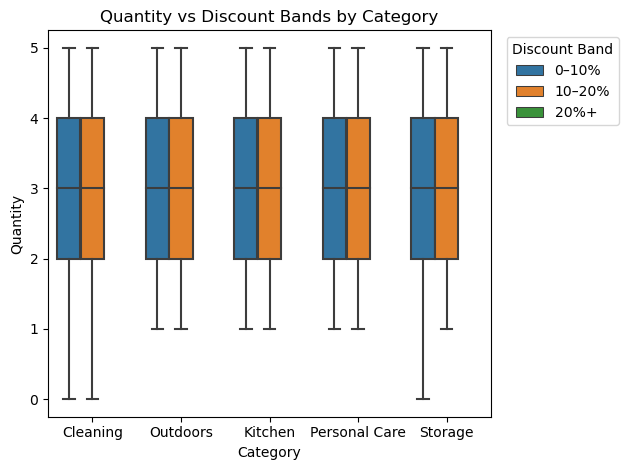

In [42]:
# 3) Boxplot — quantity distribution across categories, with discount bands
plt.figure()
if "discount_applied" in merged_df.columns:
    merged_df["discount_band"] = pd.cut(
        merged_df["discount_applied"],
        bins=[-0.001, 0.10, 0.20, 1.0],
        labels=["0–10%", "10–20%", "20%+"]
    )
sns.boxplot(data=merged_df.dropna(subset=["category", "quantity"]), x="category", y="quantity", hue="discount_band")
plt.title("Quantity vs Discount Bands by Category")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.legend(title="Discount Band", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig("figs/3_quantity_vs_discount_by_category.png", dpi=150)
plt.show()

Columns used for correlation: ['revenue', 'discount_applied', 'quantity', 'unit_price']


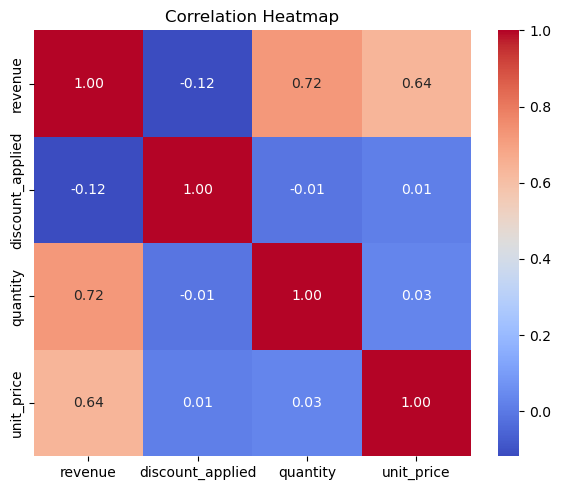

In [43]:
# 4) Heatmap — correlation between revenue, discount, quantity
plt.figure(figsize=(6,5))

# Pick only numeric columns
corr_cols = [c for c in ["revenue", "discount_applied", "quantity", "unit_price"] if c in merged_df.columns]
print("Columns used for correlation:", corr_cols)

# Convert selected columns to numeric explicitly
corr = merged_df[corr_cols].apply(pd.to_numeric, errors="coerce").corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("figs/4_corr_heatmap.png", dpi=150)
plt.show()

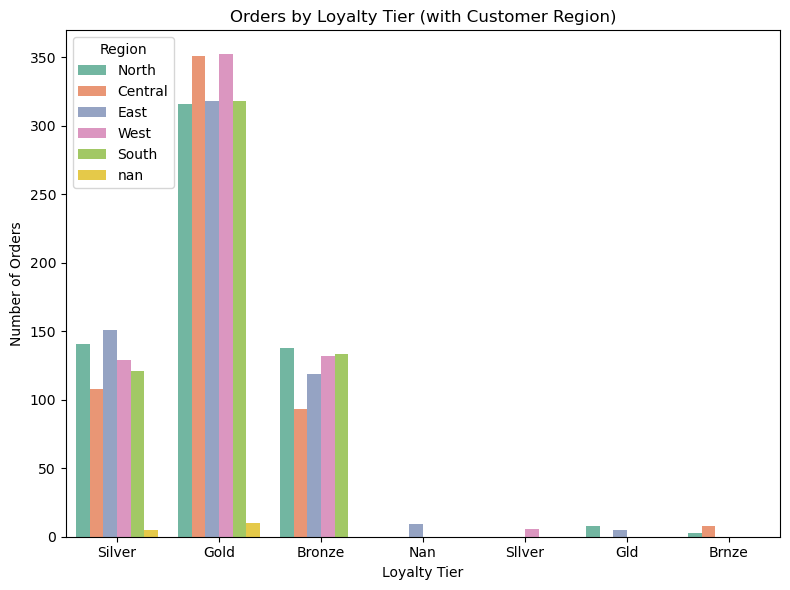

In [44]:
# 5) Countplot — orders by loyalty tier (hue = customer region)
plt.figure(figsize=(8,6))

sns.countplot(
    data=merged_df,
    x="loyalty_tier",
    hue="region",
    palette="Set2"
)

plt.title("Orders by Loyalty Tier (with Customer Region)")
plt.xlabel("Loyalty Tier")
plt.ylabel("Number of Orders")
plt.legend(title="Region")
plt.tight_layout()
plt.savefig("figs/5_orders_by_loyalty_tier_region.png", dpi=150)
plt.show()


Stacked data preview:
delivery_status  Cancelled  Delayed  Delivered  Delrd  Delyd  Nan
price_band                                                       
Low                    108      187        195      1      0    1
Medium                 220      439        456      0      1    0
High                   263      546        579      0      0    2


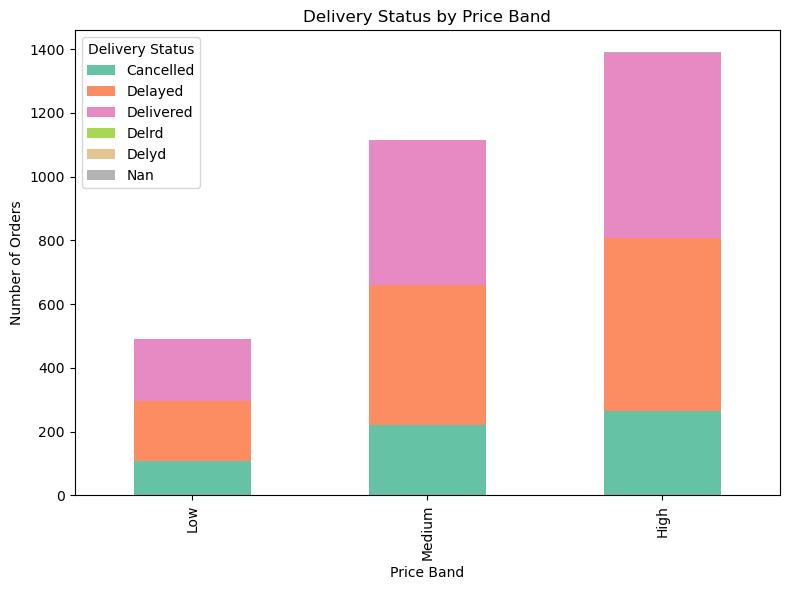

In [45]:
# 6) Stacked bar — delivery status by price band
stacked_data = (
    merged_df
      .groupby(["price_band", "delivery_status"])
      .size()
      .unstack(fill_value=0)   # rows=price_band, cols=delivery_status
)

print("\nStacked data preview:")
print(stacked_data.head())

# Plot
stacked_data.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6),
    colormap="Set2"
)

plt.title("Delivery Status by Price Band")
plt.xlabel("Price Band")
plt.ylabel("Number of Orders")
plt.legend(title="Delivery Status")
plt.tight_layout()
plt.savefig("figs/6_delivery_status_by_price_band.png", dpi=150)
plt.show()
